<a href="https://colab.research.google.com/github/mastersigat/BetaGouv-Mviewer/blob/master/Cadastre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration environnement de travail

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instal contextily (fonds de carte)
!pip install contextily
# Install mapclassify (cartographie thématique)
!pip install mapclassify
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
# Pour la cartographie interactive
!pip install folium

In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib as plt #Visualisation de données
import geopandas as gpd #Gestion données spatiales
import pygeos #Opérations sur les géométrie de données spatiales
import contextily as ctx #Fonds de carte
import numpy as np #Manipulation de tableaux
import shapely #Manipulation de géométrie
import folium #Cartographie interactive
import mapclassify #Cartographie thématique

# Importation des données (cadastre.data.gouv.fr)

Nous travaillons ici sur la commune de Cesson Sévigné (code insee 35051)

In [ ]:
#Téléchargement des datas depuis cadastre.data.gouv
!wget https://cadastre.data.gouv.fr/bundler/cadastre-etalab/communes/35051/shp/batiments -O batiments.zip
!wget https://cadastre.data.gouv.fr/bundler/cadastre-etalab/communes/35051/shp/parcelles -O parcelles.zip
!wget https://cadastre.data.gouv.fr/bundler/cadastre-etalab/communes/35051/shp/sections -O sections.zip

commune   nom type     created     updated  \
0   35051  None   01  2020-06-16  2020-06-22   
1   35051  None   01  2020-06-16  2020-06-22   
2   35051  None   01  2020-06-16  2020-06-22   

                                            geometry  
0  POLYGON ((357222.008 6790493.977, 357213.758 6...  
1  POLYGON ((357187.130 6790473.351, 357193.638 6...  
2  POLYGON ((357208.471 6790399.177, 357213.178 6...

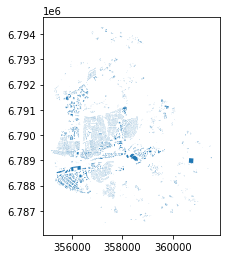

In [ ]:
#Chargement couche Batiments
Batiments= gpd.read_file("batiments.zip", encoding='utf-8')
Batiments.plot()
Batiments.head(3)

In [ ]:
#Compter le nombre de batiments
len(Batiments)

9047

id commune prefixe section numero  contenance     created  \
0  35051000AA0562   35051     000      AA    562     42655.0  2020-06-16   
1  35051000AA0564   35051     000      AA    564     21375.0  2020-06-16   
2  35051000AA0563   35051     000      AA    563      6378.0  2020-06-16   

      updated                                           geometry  
0  2021-01-29  POLYGON ((357147.131 6790343.595, 357174.713 6...  
1  2021-01-29  POLYGON ((357023.822 6790674.048, 357025.859 6...  
2  2021-01-29  POLYGON ((357515.617 6790355.263, 357541.619 6...

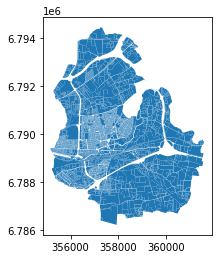

In [ ]:
#Chargement couche Parcelles
Parcelles= gpd.read_file("parcelles.zip", encoding='utf-8')
Parcelles.plot()
Parcelles.head(3)

In [ ]:
#Compter le nombre de parcelles
len(Parcelles)

8949

id commune prefixe code     created     updated  \
0  35051000AA   35051     000   AA  2020-06-16  2020-06-22   
1  35051000AB   35051     000   AB  2020-06-16  2020-06-22   
2  35051000AC   35051     000   AC  2020-06-16  2020-06-22   

                                            geometry  
0  POLYGON ((357095.719 6790338.898, 357089.990 6...  
1  POLYGON ((357603.646 6790021.629, 357544.963 6...  
2  POLYGON ((357841.087 6789716.194, 357850.289 6...

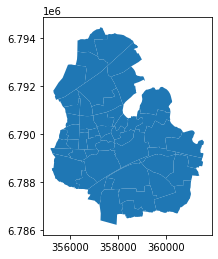

In [ ]:
#Chargement couche Sections
Sections= gpd.read_file("sections.zip", encoding='utf-8')
Sections.plot()
Sections.head(3)

# Préparation des couches

In [ ]:
# Vérifier le SCR des couches

Batiments.crs
Parcelles.crs
Sections.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#Créer un ID unique pour chaque batiment (id unique)

Batiments["ID_Bati"] = Batiments.index
Batiments.head()

commune   nom type     created     updated  \
0   35051  None   01  2020-06-16  2020-06-22   
1   35051  None   01  2020-06-16  2020-06-22   
2   35051  None   01  2020-06-16  2020-06-22   
3   35051  None   01  2020-06-16  2020-06-22   
4   35051  None   01  2020-06-16  2020-06-22   

                                            geometry  ID_Bati  
0  POLYGON ((357222.008 6790493.977, 357213.758 6...        0  
1  POLYGON ((357187.130 6790473.351, 357193.638 6...        1  
2  POLYGON ((357208.471 6790399.177, 357213.178 6...        2  
3  POLYGON ((357201.063 6790536.791, 357202.418 6...        3  
4  POLYGON ((357170.131 6790496.341, 357177.821 6...        4

In [ ]:
# Créer un ID unique pour chaque parcelle (concaténation de deux champs)

Parcelles["ID_Parcelle"] = Parcelles["prefixe"] + "-" + Parcelles["section"] + "-" + Parcelles["numero"]
Parcelles.head(3)

id commune prefixe section numero  contenance     created  \
0  35051000AA0562   35051     000      AA    562     42655.0  2020-06-16   
1  35051000AA0564   35051     000      AA    564     21375.0  2020-06-16   
2  35051000AA0563   35051     000      AA    563      6378.0  2020-06-16   

      updated                                           geometry ID_Parcelle  
0  2021-01-29  POLYGON ((357147.131 6790343.595, 357174.713 6...  000-AA-562  
1  2021-01-29  POLYGON ((357023.822 6790674.048, 357025.859 6...  000-AA-564  
2  2021-01-29  POLYGON ((357515.617 6790355.263, 357541.619 6...  000-AA-563

In [ ]:
# Créer un ID unique pour chaque section (concaténation de deux champs)

Sections["ID_Section"] = Sections["prefixe"] + "-" + Sections["code"]
Sections.head(3)

id commune prefixe code     created     updated  \
0  35051000AA   35051     000   AA  2020-06-16  2020-06-22   
1  35051000AB   35051     000   AB  2020-06-16  2020-06-22   
2  35051000AC   35051     000   AC  2020-06-16  2020-06-22   

                                            geometry ID_Section  
0  POLYGON ((357095.719 6790338.898, 357089.990 6...     000-AA  
1  POLYGON ((357603.646 6790021.629, 357544.963 6...     000-AB  
2  POLYGON ((357841.087 6789716.194, 357850.289 6...     000-AC

In [ ]:
# Ajouter une colonne surface aux sections cadastrales

Sections["Surface_Section"] = Sections['geometry'].area
Sections.head(3) 

id commune prefixe code     created     updated  \
0  35051000AA   35051     000   AA  2020-06-16  2020-06-22   
1  35051000AB   35051     000   AB  2020-06-16  2020-06-22   
2  35051000AC   35051     000   AC  2020-06-16  2020-06-22   

                                            geometry ID_Section  \
0  POLYGON ((357095.719 6790338.898, 357089.990 6...     000-AA   
1  POLYGON ((357603.646 6790021.629, 357544.963 6...     000-AB   
2  POLYGON ((357841.087 6789716.194, 357850.289 6...     000-AC   

   Surface_Section  
0    369064.681658  
1    214286.256561  
2    142503.178738

In [ ]:
# Ajouter une colonne surface aux parcelles cadastrales

Parcelles["Surface_Parcelle"] = Parcelles['geometry'].area
Parcelles.head(3) 

id commune prefixe section numero  contenance     created  \
0  35051000AA0562   35051     000      AA    562     42655.0  2020-06-16   
1  35051000AA0564   35051     000      AA    564     21375.0  2020-06-16   
2  35051000AA0563   35051     000      AA    563      6378.0  2020-06-16   

      updated                                           geometry ID_Parcelle  \
0  2021-01-29  POLYGON ((357147.131 6790343.595, 357174.713 6...  000-AA-562   
1  2021-01-29  POLYGON ((357023.822 6790674.048, 357025.859 6...  000-AA-564   
2  2021-01-29  POLYGON ((357515.617 6790355.263, 357541.619 6...  000-AA-563   

   Surface_Parcelle  
0      42589.708869  
1      23922.911984  
2       5647.585310

In [ ]:
# Ajouter une colonne surface aux batiments

Batiments["Surface_Batiment"] = Batiments['geometry'].area
Batiments.head(3) 

commune   nom type     created     updated  \
0   35051  None   01  2020-06-16  2020-06-22   
1   35051  None   01  2020-06-16  2020-06-22   
2   35051  None   01  2020-06-16  2020-06-22   

                                            geometry  ID_Bati  \
0  POLYGON ((357222.008 6790493.977, 357213.758 6...        0   
1  POLYGON ((357187.130 6790473.351, 357193.638 6...        1   
2  POLYGON ((357208.471 6790399.177, 357213.178 6...        2   

   Surface_Batiment  
0        100.642954  
1         92.067686  
2        114.465134

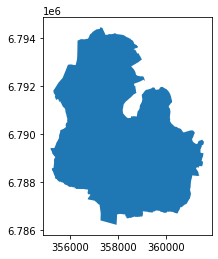

In [ ]:
# Créer une couche avec l'emprise de Cesson

Cesson = Sections.dissolve(by="commune")
Cesson.plot()

# Analyses spatiales

*   Compter le nombre de bâtiments par section cadastrale
*   Compter le nombre de bâtiments par parcelle cadastrale
*   Calculer la proportion de surface des bâtiments par parcelle cadastrale 

## Compter le nombre de bâtiments par section cadastrale


commune   nom type     created     updated                        geometry  \
0   35051  None   01  2020-06-16  2020-06-22  POINT (357214.927 6790493.368)   
1   35051  None   01  2020-06-16  2020-06-22  POINT (357186.831 6790466.391)   
2   35051  None   01  2020-06-16  2020-06-22  POINT (357216.900 6790398.322)   

   ID_Bati  Surface_Batiment  
0        0        100.642954  
1        1         92.067686  
2        2        114.465134

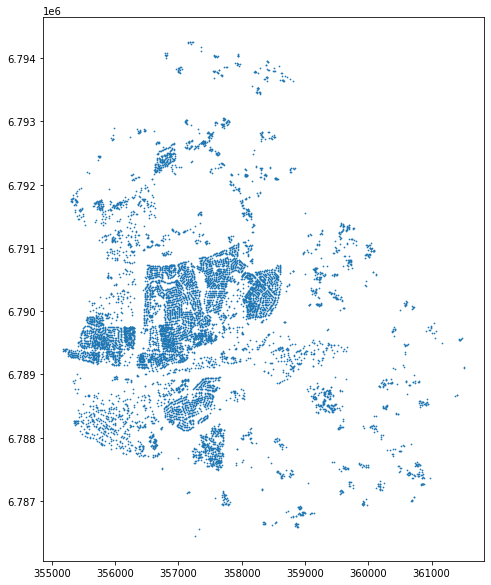

In [ ]:
#Transformer les batiments (polygones) en points (centroides)

BatimentsCentro = Batiments.copy()
BatimentsCentro.geometry = BatimentsCentro['geometry'].centroid
BatimentsCentro.crs =Batiments.crs
BatimentsCentro.plot(figsize=(300,10), markersize=0.5, legend=True)
BatimentsCentro.head(3)

In [ ]:
# Encrichir les batiments des informations de la couche des Sections Cadastrales (jointure spatiale)

BatimentsEtape1 = gpd.sjoin(BatimentsCentro, Sections)
BatimentsEtape1.head(5)

commune_left   nom type created_left updated_left  \
0        35051  None   01   2020-06-16   2020-06-22   
1        35051  None   01   2020-06-16   2020-06-22   
2        35051  None   01   2020-06-16   2020-06-22   
3        35051  None   01   2020-06-16   2020-06-22   
4        35051  None   01   2020-06-16   2020-06-22   

                         geometry  ID_Bati  Surface_Batiment  index_right  \
0  POINT (357214.927 6790493.368)        0        100.642954            0   
1  POINT (357186.831 6790466.391)        1         92.067686            0   
2  POINT (357216.900 6790398.322)        2        114.465134            0   
3  POINT (357196.770 6790531.821)        3        139.128770            0   
4  POINT (357176.881 6790496.643)        4        107.707947            0   

           id commune_right prefixe code created_right updated_right  \
0  35051000AA         35051     000   AA    2020-06-16    2020-06-22   
1  35051000AA         35051     000   AA    2020-06-16    2020-06-22   
2  35051000AA         35051     000   AA    2020-06-16    2020-06-22   
3  35051000AA         35051     000   AA    2020-06-16    2020-06-22   
4  35051000AA         35051     000   AA    2020-06-16    2020-06-22   

  ID_Section  Surface_Section  
0     000-AA    369064.681658  
1     000-AA    369064.681658  
2     000-AA    369064.681658  
3     000-AA    369064.681658  
4     000-AA    369064.681658

In [ ]:
#Réorganiser la table

BatimentsEtape2 = BatimentsEtape1[["ID_Bati", "type", "code", "Surface_Batiment", "ID_Section", "Surface_Section", "geometry"]]
BatimentsEtape2.head(3)

ID_Bati type code  Surface_Batiment ID_Section  Surface_Section  \
0        0   01   AA        100.642954     000-AA    369064.681658   
1        1   01   AA         92.067686     000-AA    369064.681658   
2        2   01   AA        114.465134     000-AA    369064.681658   

                         geometry  
0  POINT (357214.927 6790493.368)  
1  POINT (357186.831 6790466.391)  
2  POINT (357216.900 6790398.322)

In [ ]:
# Encrichir les batiments des informations de la couche des parcelles Cadastrales (jointure spatiale)

BatimentsEtape3 = gpd.sjoin(BatimentsEtape2, Parcelles)
BatimentsEtape3.head(3)

ID_Bati type code  Surface_Batiment ID_Section  Surface_Section  \
0        0   01   AA        100.642954     000-AA    369064.681658   
1        1   01   AA         92.067686     000-AA    369064.681658   
2        2   01   AA        114.465134     000-AA    369064.681658   

                         geometry  index_right              id commune  \
0  POINT (357214.927 6790493.368)           15  35051000AA0126   35051   
1  POINT (357186.831 6790466.391)           14  35051000AA0124   35051   
2  POINT (357216.900 6790398.322)           22  35051000AA0119   35051   

  prefixe section numero  contenance     created     updated ID_Parcelle  \
0     000      AA    126       580.0  2020-06-16  2021-01-29  000-AA-126   
1     000      AA    124       468.0  2020-06-16  2021-01-29  000-AA-124   
2     000      AA    119       513.0  2020-06-16  2021-01-29  000-AA-119   

   Surface_Parcelle  
0        584.534522  
1        470.937329  
2        511.476178

In [ ]:
#Réorganiser la table

BatimentsFinal = BatimentsEtape3[["ID_Bati", "type", "code", "Surface_Batiment", "ID_Section", "Surface_Section", "ID_Parcelle", "Surface_Parcelle", "geometry"]]
BatimentsFinal.head(3)

ID_Bati type code  Surface_Batiment ID_Section  Surface_Section  \
0        0   01   AA        100.642954     000-AA    369064.681658   
1        1   01   AA         92.067686     000-AA    369064.681658   
2        2   01   AA        114.465134     000-AA    369064.681658   

  ID_Parcelle  Surface_Parcelle                        geometry  
0  000-AA-126        584.534522  POINT (357214.927 6790493.368)  
1  000-AA-124        470.937329  POINT (357186.831 6790466.391)  
2  000-AA-119        511.476178  POINT (357216.900 6790398.322)

In [ ]:
# Jointure attributaire pour repasser sur la couche des polygones

BatimentsFinalOk = Batiments.merge(BatimentsFinal, on='ID_Bati')
BatimentsFinalOk.head(3)

commune   nom type_x     created     updated  \
0   35051  None     01  2020-06-16  2020-06-22   
1   35051  None     01  2020-06-16  2020-06-22   
2   35051  None     01  2020-06-16  2020-06-22   

                                          geometry_x  ID_Bati  \
0  POLYGON ((357222.008 6790493.977, 357213.758 6...        0   
1  POLYGON ((357187.130 6790473.351, 357193.638 6...        1   
2  POLYGON ((357208.471 6790399.177, 357213.178 6...        2   

   Surface_Batiment_x type_y code  Surface_Batiment_y ID_Section  \
0          100.642954     01   AA          100.642954     000-AA   
1           92.067686     01   AA           92.067686     000-AA   
2          114.465134     01   AA          114.465134     000-AA   

   Surface_Section ID_Parcelle  Surface_Parcelle  \
0    369064.681658  000-AA-126        584.534522   
1    369064.681658  000-AA-124        470.937329   
2    369064.681658  000-AA-119        511.476178   

                       geometry_y  
0  POINT (357214.927 6790493.368)  
1  POINT (357186.831 6790466.391)  
2  POINT (357216.900 6790398.322)

In [ ]:
#Réorganiser la table
BatimentsFinalOk = BatimentsFinalOk[["ID_Bati", "type_x", "Surface_Batiment_x", "ID_Section", "Surface_Section", "ID_Parcelle", "Surface_Parcelle", "geometry_x"]]
BatimentsFinalOk.rename(columns={'type_x': 'type','Surface_Batiment_x': 'Surface_Batiment','geometry_x': 'Geometry'}, inplace=True)
BatimentsFinalOk.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ID_Bati type  Surface_Batiment ID_Section  Surface_Section ID_Parcelle  \
0        0   01        100.642954     000-AA    369064.681658  000-AA-126   
1        1   01         92.067686     000-AA    369064.681658  000-AA-124   
2        2   01        114.465134     000-AA    369064.681658  000-AA-119   
3        3   01        139.128770     000-AA    369064.681658   000-AA-78   
4        4   01        107.707947     000-AA    369064.681658   000-AA-82   

   Surface_Parcelle                                           Geometry  
0        584.534522  POLYGON ((357222.008 6790493.977, 357213.758 6...  
1        470.937329  POLYGON ((357187.130 6790473.351, 357193.638 6...  
2        511.476178  POLYGON ((357208.471 6790399.177, 357213.178 6...  
3        669.431314  POLYGON ((357201.063 6790536.791, 357202.418 6...  
4        577.485702  POLYGON ((357170.131 6790496.341, 357177.821 6...

ID_Bati type  Surface_Batiment ID_Section  Surface_Section ID_Parcelle  \
0        0   01        100.642954     000-AA    369064.681658  000-AA-126   
1        1   01         92.067686     000-AA    369064.681658  000-AA-124   
2        2   01        114.465134     000-AA    369064.681658  000-AA-119   

   Surface_Parcelle                                           Geometry  
0        584.534522  POLYGON ((357222.008 6790493.977, 357213.758 6...  
1        470.937329  POLYGON ((357187.130 6790473.351, 357193.638 6...  
2        511.476178  POLYGON ((357208.471 6790399.177, 357213.178 6...

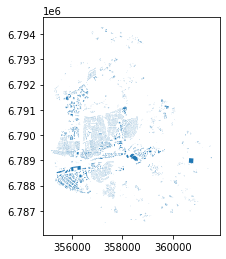

In [ ]:
#Repasser en GeoDataframe

BatiOK = gpd.GeoDataFrame(BatimentsFinalOk, crs="EPSG:2154", geometry='Geometry')
BatiOK.plot()
BatiOK.head(3)


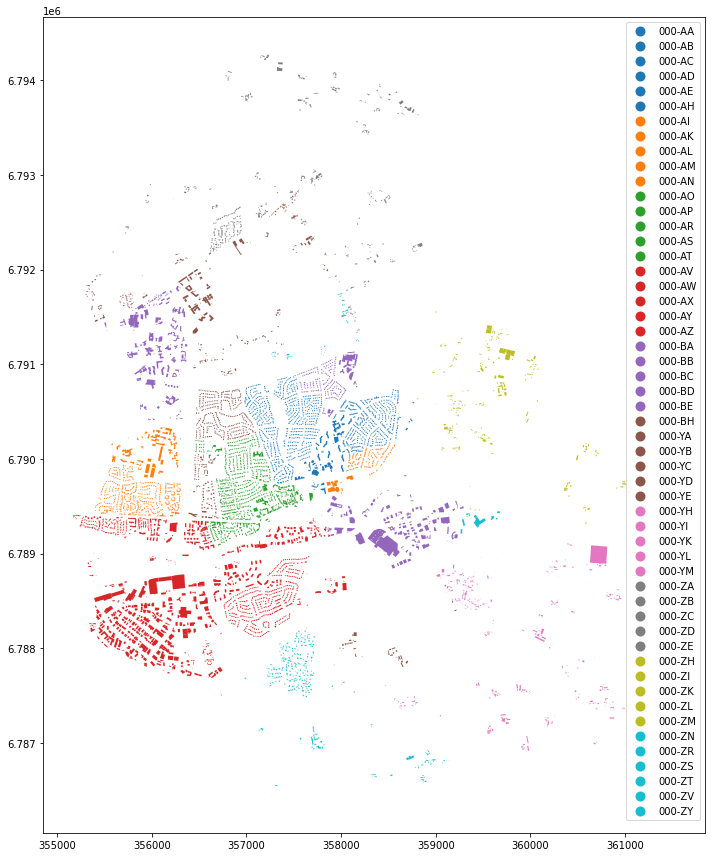

In [ ]:
# Faire une carte des batiments catégorisée par code de section

map2 = BatiOK.plot(figsize=(15,15), column='ID_Section', legend=True).get_figure()

In [ ]:
# Calculer le  nombre de batiments par sections cadastrale

NbBatiSection = BatiOK[["ID_Section", "ID_Bati"]].groupby("ID_Section").size()
NbBatiSection = pd.DataFrame(NbBatiSection)
NbBatiSection = NbBatiSection.rename(columns={0: 'NbBatis'})
NbBatiSection.head(3)

NbBatis
ID_Section         
000-AA          475
000-AB          263
000-AC          112

In [ ]:
# Compter le nombre de batiment (vérification)

total1 = Batiments['geometry'].count()
total2 = NbBatiSection['NbBatis'].sum()
print(total1)
print(total1)

9047
9047


In [ ]:
# Jointure attributaire pour repasser sur la couche des sections cadastrales

Sections = Sections.merge(NbBatiSection, on='ID_Section')
Sections.head(3)

id commune prefixe code     created     updated  \
0  35051000AA   35051     000   AA  2020-06-16  2020-06-22   
1  35051000AB   35051     000   AB  2020-06-16  2020-06-22   
2  35051000AC   35051     000   AC  2020-06-16  2020-06-22   

                                            geometry ID_Section  \
0  POLYGON ((357095.719 6790338.898, 357089.990 6...     000-AA   
1  POLYGON ((357603.646 6790021.629, 357544.963 6...     000-AB   
2  POLYGON ((357841.087 6789716.194, 357850.289 6...     000-AC   

   Surface_Section  NbBatis  
0    369064.681658      475  
1    214286.256561      263  
2    142503.178738      112

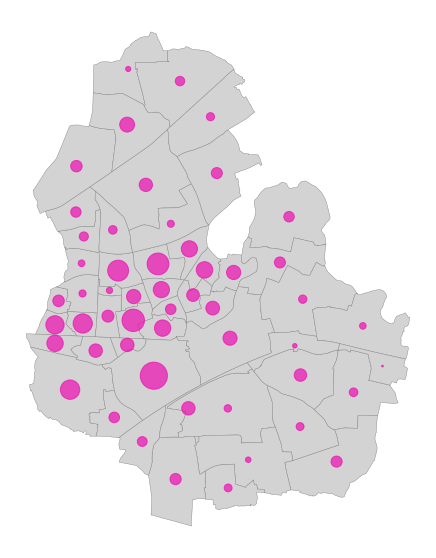

In [ ]:
# Faire une carte pour représenter le nombre de batiments pas section cadastrale

SectionsCentro = Sections.copy()
SectionsCentro.geometry = SectionsCentro['geometry'].centroid

map3, ax = plt.pyplot.subplots(figsize=(10,10))
Sections.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4)
SectionsCentro.plot(ax=ax,color="#ee0db1", markersize="NbBatis",alpha=0.7, categorical=False, legend=True)
ax.axis("off")
plt.pyplot.show()

## Compter le nombre de bâtiments par parcelle cadastrale

In [ ]:
# Calculer le Nombre de batiments par parcelle cadastrale

NbBatiParcelle  = BatiOK[["ID_Parcelle", "ID_Bati"]].groupby("ID_Parcelle").size()
NbBatiParcelle =pd.DataFrame(NbBatiParcelle)
NbBatiParcelle = NbBatiParcelle.rename(columns={0: 'NbBatis'})
NbBatiParcelle.head(5)

NbBatis
ID_Parcelle         
000-AA-10          2
000-AA-100         1
000-AA-101         1
000-AA-102         1
000-AA-103         1

In [ ]:
# Compter le nombre de batiment

total1 = Batiments['geometry'].count()
total2 = NbBatiParcelle['NbBatis'].sum()
print(total1)
print(total1)

9047
9047


In [ ]:
# Jointure attributaire pour repasser sur la couche des parcelles  cadastrales

Parcellesbis = Parcelles.merge(NbBatiParcelle, on='ID_Parcelle')
Parcellesbis.head(3)

id commune prefixe section numero  contenance     created  \
0  35051000AA0562   35051     000      AA    562     42655.0  2020-06-16   
1  35051000AA0192   35051     000      AA    192      6752.0  2020-06-16   
2  35051000AA0059   35051     000      AA     59       619.0  2020-06-16   

      updated                                           geometry ID_Parcelle  \
0  2021-01-29  POLYGON ((357147.131 6790343.595, 357174.713 6...  000-AA-562   
1  2021-01-29  POLYGON ((357526.866 6790865.979, 357527.840 6...  000-AA-192   
2  2021-01-29  POLYGON ((357024.044 6790482.974, 357016.068 6...   000-AA-59   

   Surface_Parcelle  NbBatis  
0      42589.708869        1  
1       6609.165909        1  
2        621.336887        1

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


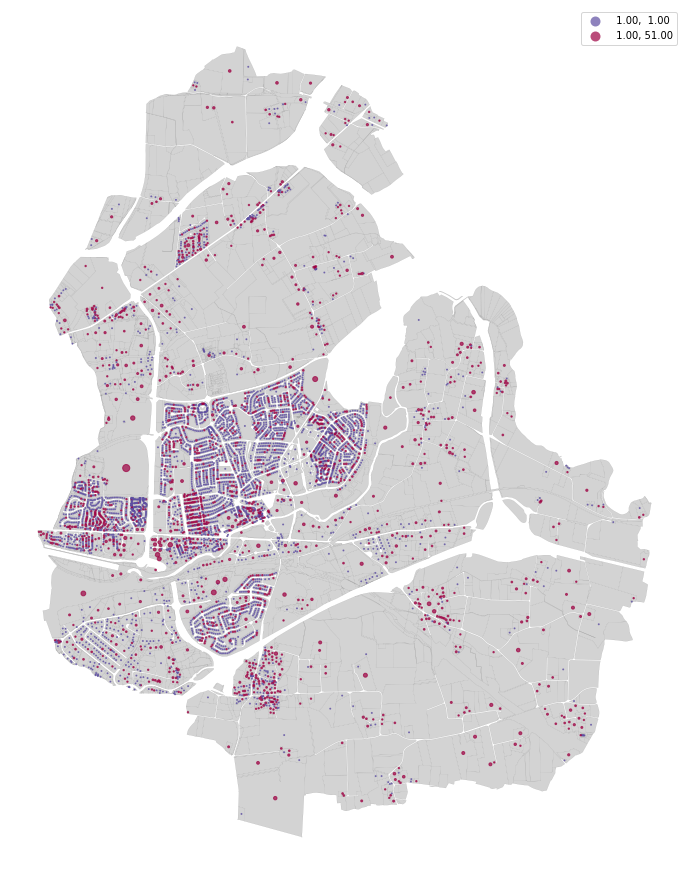

In [ ]:
# Faire une carte pour représenter le nombre de batiments par parcelle cadastrale

Parcellescentro = Parcellesbis.copy()
Parcellescentro.geometry = Parcellescentro['geometry'].centroid

map4, ax = plt.pyplot.subplots(figsize=(16,16))
Parcelles.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.1)
Parcellescentro.plot(ax=ax, markersize="NbBatis", column='NbBatis', cmap='Spectral_r',k=3, scheme='quantiles', alpha=0.7, legend=True)
ax.axis("off")
plt.pyplot.show()

## Calculer la proportion de surface des bâtiments par parcelle cadastrale (tx de recouvrement)

In [ ]:
BatiOK.head(3)

ID_Bati type  Surface_Batiment ID_Section  Surface_Section ID_Parcelle  \
0        0   01        100.642954     000-AA    369064.681658  000-AA-126   
1        1   01         92.067686     000-AA    369064.681658  000-AA-124   
2        2   01        114.465134     000-AA    369064.681658  000-AA-119   

   Surface_Parcelle                                           Geometry  
0        584.534522  POLYGON ((357222.008 6790493.977, 357213.758 6...  
1        470.937329  POLYGON ((357187.130 6790473.351, 357193.638 6...  
2        511.476178  POLYGON ((357208.471 6790399.177, 357213.178 6...

In [ ]:
# Calculer la proportion des surfaces baties par parcelle cadastrale

recap = BatiOK.groupby('ID_Parcelle').agg({'Surface_Batiment':'sum','Surface_Parcelle':'max'})
recap["propbatiparcelle"] = recap["Surface_Batiment"] / recap["Surface_Parcelle"] *100
recap.head()

Surface_Batiment  Surface_Parcelle  propbatiparcelle
ID_Parcelle                                                      
000-AA-10           99.817772        796.936781         12.525181
000-AA-100          84.995102        421.926421         20.144532
000-AA-101         139.104492        644.720353         21.575942
000-AA-102         111.440761        528.437946         21.088713
000-AA-103          91.291023        606.391468         15.054800

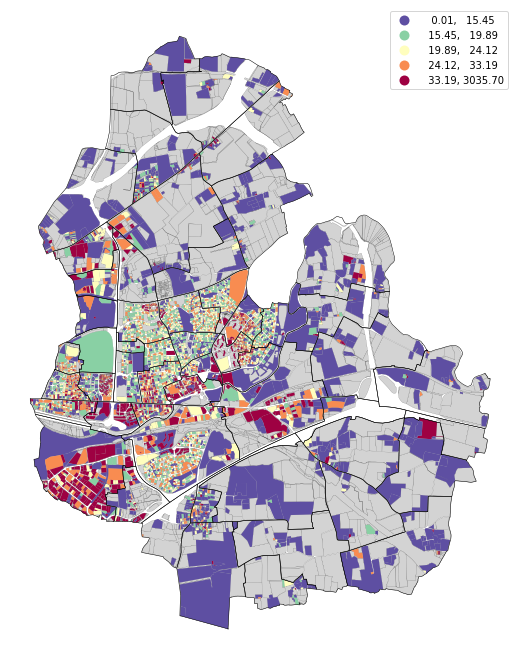

In [ ]:
# Faire la jointure attributaire avec la couche des parcelles cadastrales et la carte

Parcellesok = Parcellesbis.merge(recap, on='ID_Parcelle')
Parcellesok.head()

map5, ax = plt.pyplot.subplots(figsize=(12,12))
Sections.boundary.plot(ax=ax, edgecolor="black", linewidth=0.5)
Parcelles.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.1)
Parcellesok.plot(ax=ax, column='propbatiparcelle', cmap='Spectral_r',scheme='quantiles', legend=True)
ax.axis("off")
plt.pyplot.show()

In [ ]:
#Téléchargement des datas depuis le portail opendata de Rennes
!wget https://data.rennesmetropole.fr/explore/dataset/reseau_hydrographique/download/?format=geojson&timezone=Europe/Berlin&lang=fr -O hydrographie.geojson
!wget -O PLU.geojson https://data.rennesmetropole.fr/explore/dataset/synthese_plui_2021/download/?format=geojson&timezone=Europe/Berlin&lang=fr

--2022-03-11 17:14:35--  https://data.rennesmetropole.fr/explore/dataset/reseau_hydrographique/download/?format=geojson
/bin/bash: -O: command not found
Resolving data.rennesmetropole.fr (data.rennesmetropole.fr)... 34.248.20.69, 34.249.199.226
Connecting to data.rennesmetropole.fr (data.rennesmetropole.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘index.html?format=geojson.17’

index.html?format=g     [           <=>      ]  16.48M  4.37MB/s    in 3.8s    

2022-03-11 17:14:40 (4.37 MB/s) - ‘index.html?format=geojson.17’ saved [17284840]

--2022-03-11 17:14:41--  https://data.rennesmetropole.fr/explore/dataset/synthese_plui_2021/download/?format=geojson
Resolving data.rennesmetropole.fr (data.rennesmetropole.fr)... 34.248.20.69, 34.249.199.226
Connecting to data.rennesmetropole.fr (data.rennesmetropole.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspec

# Etude sur Cesson

## Zonage et PLU 

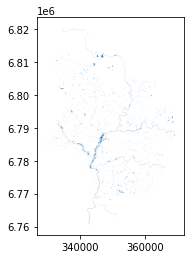

In [ ]:
#Chargement couche hydrographie
Hydrographie= gpd.read_file("hydrographie.geojson", encoding='utf-8')
Hydrographie = Hydrographie.to_crs("EPSG:2154")
Hydrographie.head()
Hydrographie.plot()

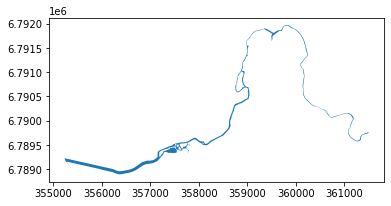

In [ ]:
# Ne garder que les troncons de tyoe "fleuve" dans la commune de Cesson
Fleuve = Hydrographie[(Hydrographie["type_hydro_nom"] == 'fleuve')]
HydroCesson = gpd.overlay(Fleuve, Cesson, how='intersection')
HydroCesson.plot()

geometry  \
deno_hydr_nom                                                      
la Vilaine     POLYGON ((355425.186 6788811.131, 355423.363 6...   

              hydro_date_maj  objectid  deno_hydro_id        gml_id  \
deno_hydr_nom                                                         
la Vilaine        2020-07-23      3747            2.0  v_hydro.3747   

               hydro_code_insee  ope_id  type_hydro_id type_hydro_nom  \
deno_hydr_nom                                                           
la Vilaine              35051.0     1.0              3         fleuve   

               hydro_visible          id prefixe code     created     updated  \
deno_hydr_nom                                                                   
la Vilaine                 1  35051000AA     000   AA  2020-06-16  2020-06-22   

              ID_Section  Surface_Section  
deno_hydr_nom                              
la Vilaine        000-AA    369064.681658

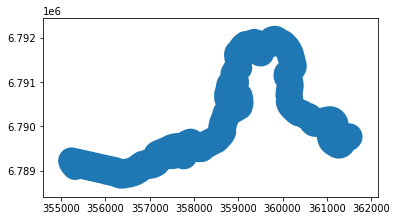

In [ ]:
#Faire un buffer de 300m autour de la couche hydro

HydroCesson['geometry'] = HydroCesson['geometry'].buffer(300)
HydroCesson = HydroCesson.dissolve(by ='deno_hydr_nom')
HydroCesson.plot()
HydroCesson.head()


objectid semio typezone datevalid                   gml_id libelle  \
0      3581  None        A  20200910  plui_synthese_2021.3581       A   
1      3773  None        A  20200910  plui_synthese_2021.3773       A   
2      3621  None       Ah  20200910  plui_synthese_2021.3621      Ai   

   perimetre_geo  id_rm    aire_geo  \
0       27649.22   3588  7314465.64   
1       13647.51   3782  2767384.21   
2         246.09   3628     3262.88   

                                            geometry  
0  MULTIPOLYGON (((344457.097 6802558.021, 344411...  
1  MULTIPOLYGON (((363746.240 6779990.971, 363759...  
2  MULTIPOLYGON (((350607.515 6793646.454, 350600...

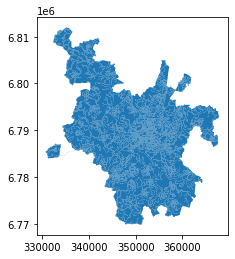

In [ ]:
#Chargement couche du PLU
PLU= gpd.read_file("PLU.geojson", encoding='utf-8')
PLU = PLU.to_crs("EPSG:2154")
PLU.plot()
PLU.head(3)

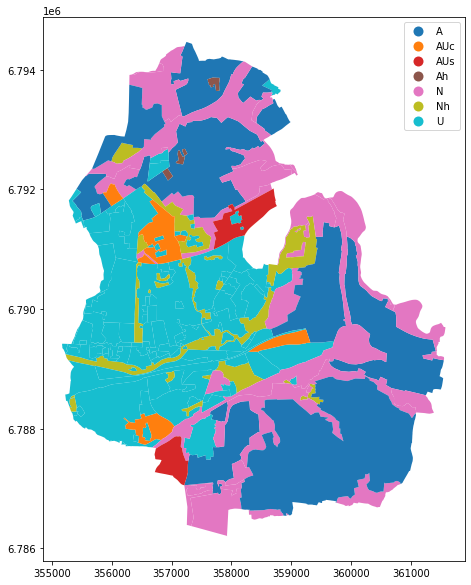

In [ ]:
#Ne garder sur le PLU de Cesson
PLUCesson = gpd.overlay(PLU, Cesson, how='intersection')
PLUCesson.plot(figsize=(10,10),column='typezone', legend=True)

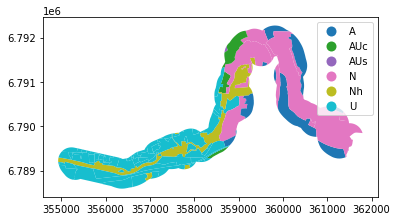

In [ ]:
# Garder le zonage situés à moins de 300m de la Vilaine
Zonagerisque = gpd.overlay(PLU, HydroCesson, how='intersection')
Zonagerisque.plot(column = 'typezone', legend = True)

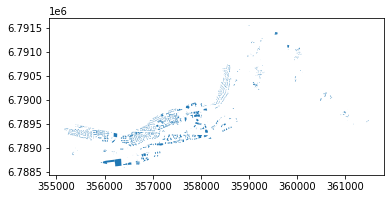

In [ ]:
# Garder les bâtiments situés à moins de 300m de la Vilaine
Batirisque = gpd.overlay(Batiments, HydroCesson, how='intersection')
Batirisque.plot()

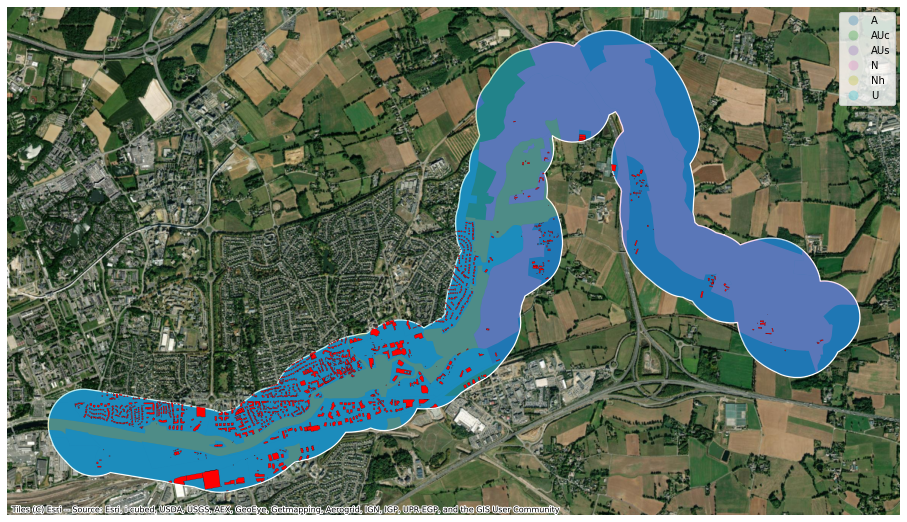

In [ ]:
#Carte récapitulative

map5, ax = plt.pyplot.subplots(figsize=(16,16))
HydroCesson.to_crs('EPSG:3857').plot(ax=ax, edgecolor="white", linewidth=1.3 )
Zonagerisque.to_crs('EPSG:3857').plot(ax = ax, column = 'typezone', legend = True, alpha=0.3)
Batirisque.to_crs('EPSG:3857').plot(ax=ax, color="red",edgecolor="black", linewidth=0.15)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
ax.axis("off")
plt.pyplot.show()

commune   nom type created_left updated_left  \
0   35051  None   01   2020-06-16   2020-06-22   
1   35051  None   01   2020-06-16   2020-06-22   

                                            geometry  ID_Bati  \
0  POLYGON ((357222.008 6790493.977, 357213.758 6...        0   
1  POLYGON ((357187.130 6790473.351, 357193.638 6...        1   

   Surface_Batiment  index_right  objectid  ... perimetre_geo id_rm  \
0        100.642954          110      3783  ...       9284.87  3792   
1         92.067686          110      3783  ...       9284.87  3792   

    aire_geo          id prefixe  code  created_right  updated_right  \
0  801679.82  35051000AA     000    AA     2020-06-16     2020-06-22   
1  801679.82  35051000AA     000    AA     2020-06-16     2020-06-22   

  ID_Section Surface_Section  
0     000-AA   369064.681658  
1     000-AA   369064.681658  

[2 rows x 25 columns]

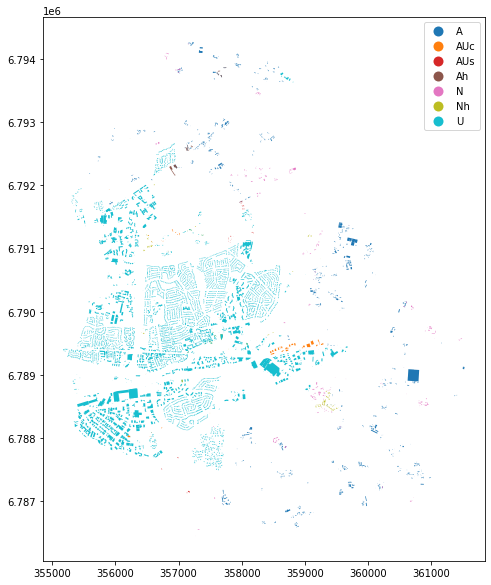

In [ ]:
# Encrichir les batiments des informations de la couche PLU (jointure spatiale)

BatimentsPLU = gpd.sjoin(Batiments, PLUCesson)
BatimentsPLU.plot(figsize=(10,10),column='typezone', legend=True)
BatimentsPLU.head(2)

ID_Bati
typezone         
A            1072
AUc            71
AUs            30
Ah             31
N             293

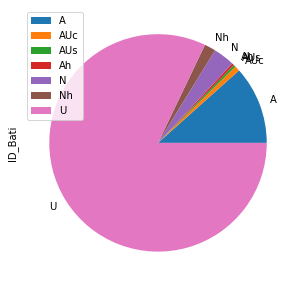

In [ ]:
# Graphie du nombre de bâtiments par zonage

Categorie = BatimentsPLU[["typezone", "ID_Bati"]].groupby("typezone").count()
Categorie.plot.pie(figsize =(14,5), y="ID_Bati" )
Categorie.head()
